# Figure 3
## theta vs. hamming distance from source.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
from matplotlib import rcParams

rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']
rcParams['svg.fonttype'] = 'none'

## Functions

In [29]:
def plot_thetas(dfluxes, ax):
    """"""
    #fig, ax = plt.subplots(figsize=(2,1.5))
    
    means = []
    xs, ys = [], []
    for key, val in dfluxes.items():
        y = np.ma.masked_invalid(val)
        ymean = np.nanmean(y)
        x = np.ones(len(y)) * (key+1)
        xjitter = x + np.random.randn(len(x))* .08
        ys += list(y)
        xs += list(xjitter)
        means.append(ymean)

    ax.scatter(xs,ys, marker="o", color="gray", alpha=1, s=4, rasterized=True)

    x = range(1, 8)
    y = means
    ax.scatter(x,y, marker="o", color="k", s=4)
    #ax.set_xlabel("hamming distance")
    #ax.set_ylabel("$\\theta$")
    ax.axis([0,8,-0.05,1.05])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.spines["bottom"].set_bounds(1, 7)
    ax.spines["left"].set_bounds(0,1)
    ax.set_yticks([0,.5,1])
    l = ax.set_xticks(range(1,8))  
    #return fig, ax

## Full state predictions

In [9]:
dataset = "full-state-predictions"
filepath = "generated-data/%s/results/statistics-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    dfluxes1 = pickle.load(f)
    dfluxes1.pop(7)

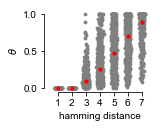

In [36]:
fig, ax = plot_thetas(dfluxes)
fig.savefig("figures/full-state-open-predictions.pdf", format="pdf", dpi=600, bbox_inches="tight")

## Two state predictions

In [10]:
dataset = "two-state-predictions"
filepath = "generated-data/%s/results/statistics-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    dfluxes2 = pickle.load(f)
    dfluxes2.pop(7)

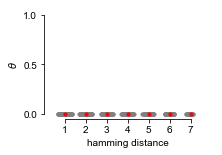

In [17]:
fig, ax = plot_thetas(dfluxes)
fig.savefig("figures/two-state-open-predictions.pdf", format="pdf", dpi=600, bbox_inches="tight")

## Three state predictions

In [11]:
dataset = "three-state-predictions"
filepath = "generated-data/%s/results/statistics-output.pickle" % dataset

# Read file
with open(filepath, "rb") as f:
    dfluxes3 = pickle.load(f)
    dfluxes3.pop(7)

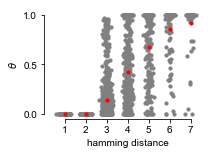

In [19]:
fig, ax = plot_thetas(dfluxes)
fig.savefig("figures/three-state-open-predictions.pdf", format="pdf", dpi=600, bbox_inches="tight")

/Users/Zsailer/.virtualenvs/py3/lib/python3.5/site-packages/numpy/ma/core.py:2766: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)


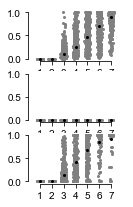

In [30]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(1.7,3.2))

gs = gridspec.GridSpec(3, 1)
ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[1, 0], sharex=ax1)
ax3 = plt.subplot(gs[2, 0], sharex=ax1)

plot_thetas(dfluxes1, ax1)
plot_thetas(dfluxes2, ax2)
plot_thetas(dfluxes3, ax3)

In [31]:
fig.savefig("figures/fig-3b.pdf", format="pdf", dpi=600, bbox_inches="tight")